# 🏡 House Prices - Advanced Regression Techniques 

In this notebook, we'll try to predict house prices around Ames, Iowa. There are 79 features, independent variables we can work on, and this dataset was created by Dean De Cock for data science education. You can get more information by visitng the Kaggle page:

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview/description 

Let's begin by defining our objective:

* **Objective**: Given 79 features, we'd like to predict *the exact price of an house* with the minumum amount of error. (Root-Mean-Squared-Log-Error)
* This is a *supervised learning* example, since the model will be trained on data with *labeled examples*.
* This is a typical *regression* problem, since we're trying to predict a value. Moreover, this is a *univariate regression* problem beacuse we are trying to predict only one feature which is the price of the given house. 
* **Evaluation**:
> From the page: Submissions are evaluated on **Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price.** (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)
 

### Getting Started with Data

I downloaded and uploaded the training data the my Google Drive account. To access the data, we'll mount our drive account to this notebook. 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Standard tools for data analysis
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/house-prices-advanced-regression/data/train.csv")

### Exploratory Data Analysis (EDA)

In [4]:
df.shape

(1460, 81)

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


There are 79 features we can use for our model's prediction. Since Id column is not necessary, we can drop it. 

In [6]:
# Drop Id column
df = df.drop("Id", axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

We have object type data. We need to convert them to numeric values so that machine learning algorithms to be able to work on them. 

In [8]:
# Descriptive statistics for numeric values
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


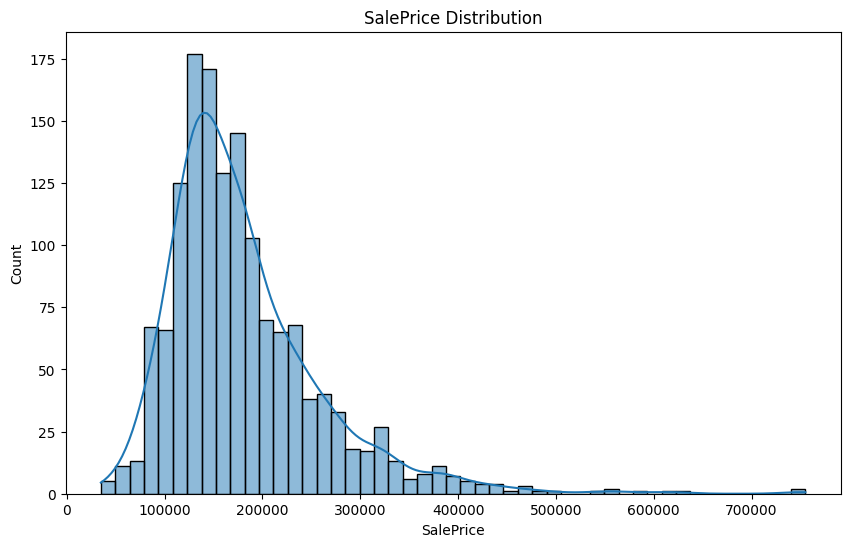

In [9]:
# Histogram of the target variable (SalePrice)
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('SalePrice Distribution')
plt.xlabel('SalePrice')
plt.ylabel('Count')
plt.show()

As you see, the histogram of the target variable is negatively skewed, which means that most values are clustered on the lower end of distribution. 

In [10]:
# When checking for missing values, I want to see the whole output
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Check for missing values 
df.isna().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

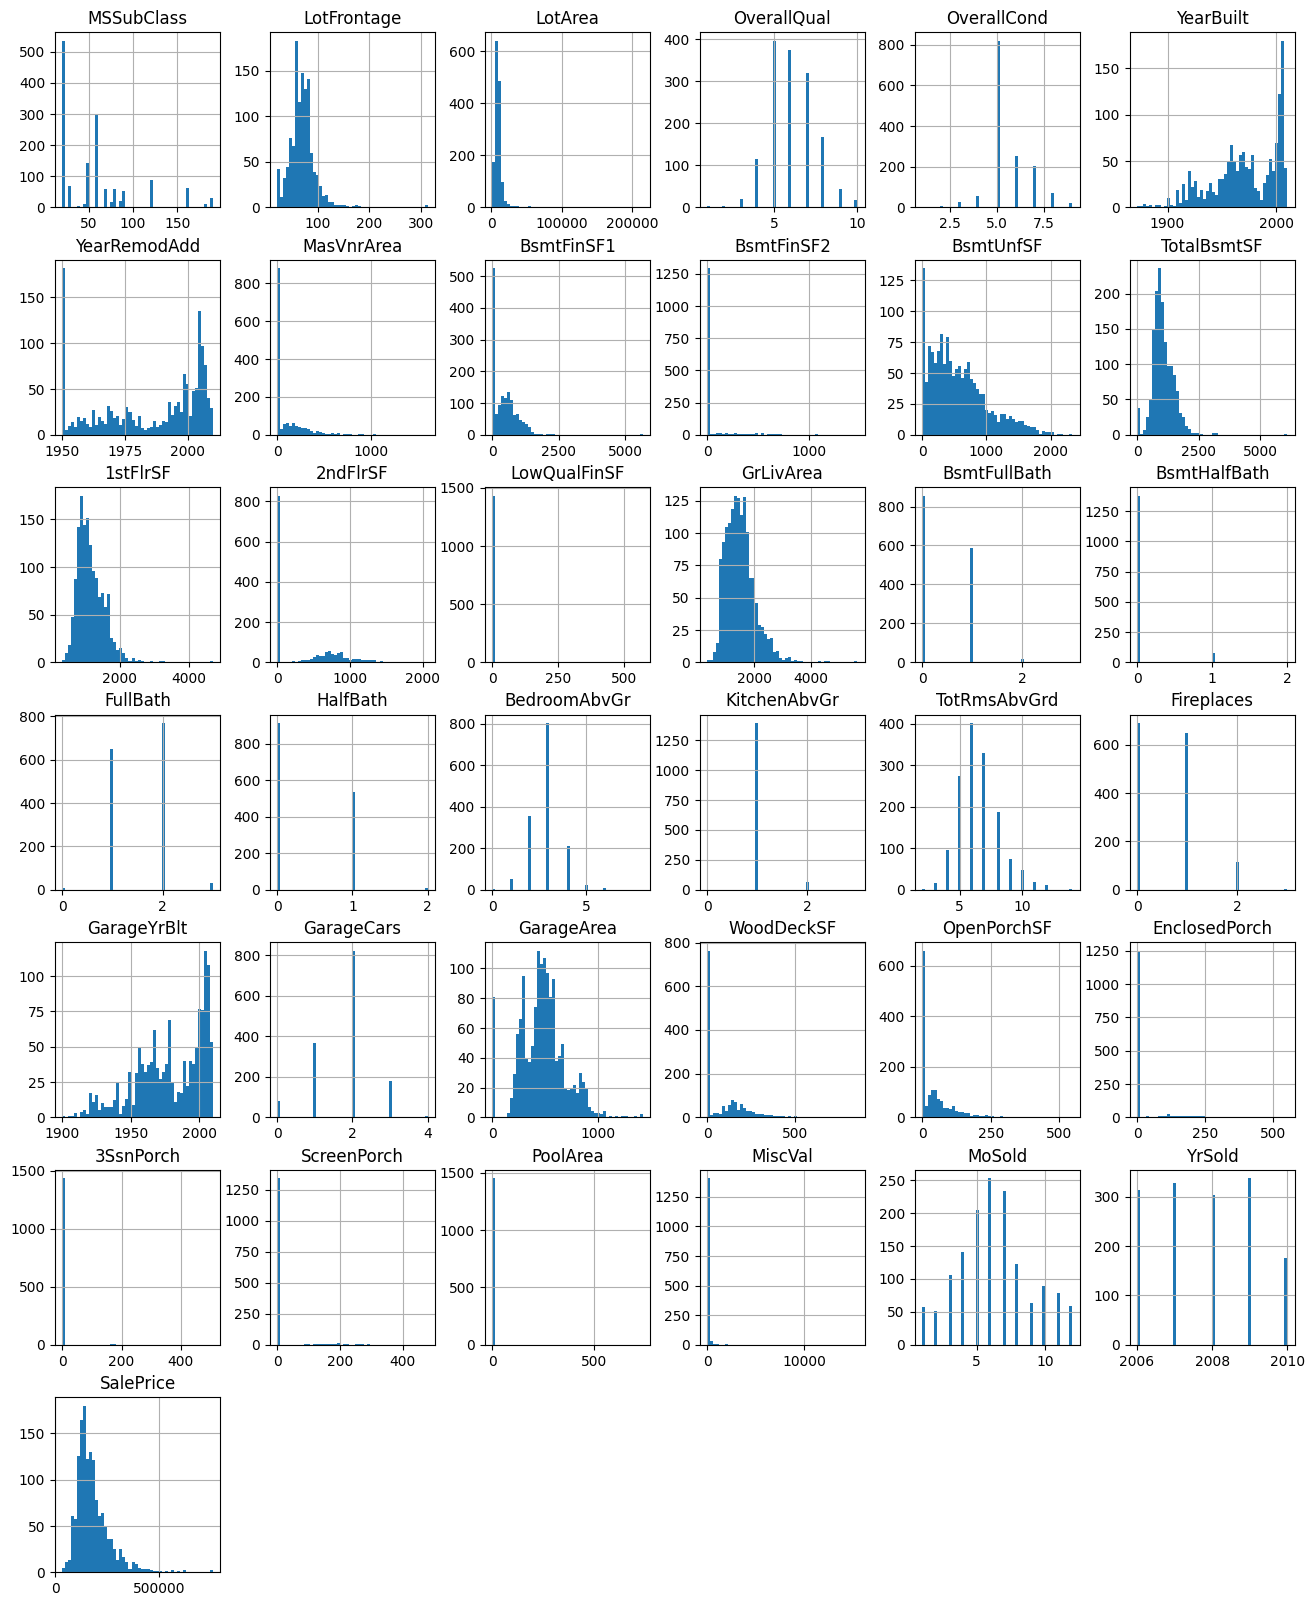

In [11]:
df.hist(bins=50, figsize=(16, 20))
plt.show()

As you see, most numeric values have positively skewed distribution. When imputing missing values, instead of mean, we should use the **median** value, since it's more robust to the outliers. 

*Correlation analysis*: We would like to show correlation matrix for the dataset. However, since we've relatively large number of (78 in our case) variables, the resulting matrix can be unintelligible due to overcrowding. We can plot a subset of most correlating features. 

<ipython-input-12-3ab8b8e44ad4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


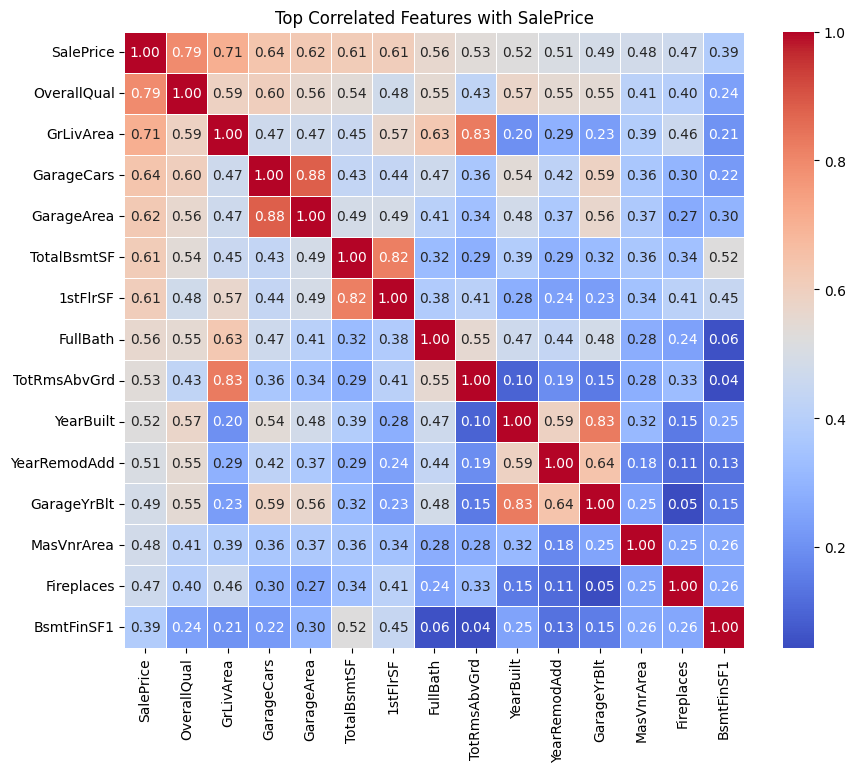

In [12]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Select the top correlated features with the target variable
top_corr_features = corr_matrix['SalePrice'].abs().nlargest(15).index

# Subset the correlation matrix
subset_corr_matrix = df[top_corr_features].corr()

# Plot the subset correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(subset_corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Top Correlated Features with SalePrice');
plt.show();

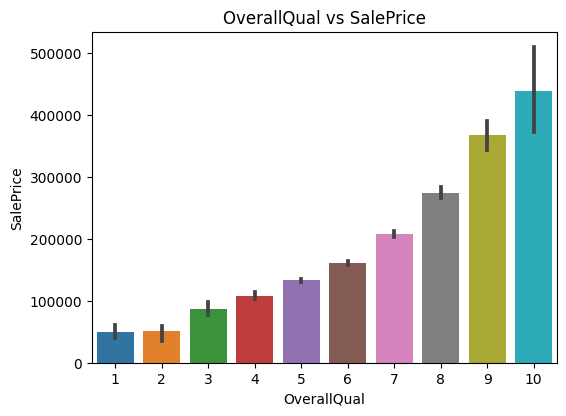

In [13]:
# Categorical feature analysis: We can plot some categorical values and their rl. with the target variable
# Bar plot of a categorical feature (e.g., OverallQual)
plt.figure(figsize=(6, 4.3))
sns.barplot(x='OverallQual', y='SalePrice', data=df)
plt.title('OverallQual vs SalePrice')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()

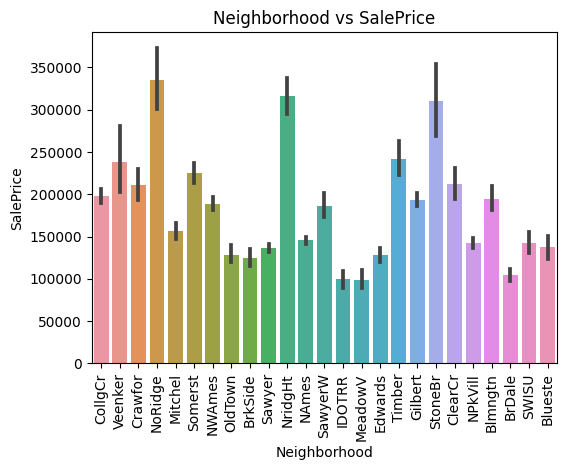

In [14]:
# Let's visualize one more: Neighborhood
plt.figure(figsize=(6, 4.3))
sns.barplot(x='Neighborhood', y='SalePrice', data=df)
plt.title('Neighborhood vs SalePrice')
plt.xlabel('Neighborhood')
plt.ylabel('SalePrice')
plt.xticks(rotation=90)
plt.show()

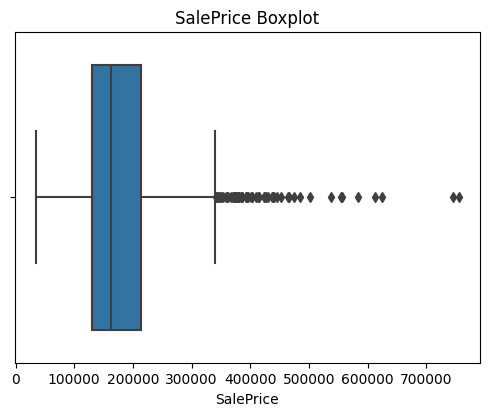

In [15]:
# Box plot of the target variable (SalePrice) to identify outliers
plt.figure(figsize=(6, 4.3))
sns.boxplot(x=df['SalePrice'])
plt.title('SalePrice Boxplot')
plt.xlabel('SalePrice')
plt.show()


### Data Cleaning & Feature Engineering 

After completing our EDA, it's time for handling missing values and converting object type values to numeric values. In that way, our machine learning models can learn patterns in the data. To decide which strategy to use in our predictions, let's first see the missing values.

For numeric values:

In [16]:
# Create original df because we'll try other imputation strategies on it later:
# Stands for dataframe_version1 
df_v1 = df.copy()

In [17]:
# Iterate over columns and check for numeric type missing values:
missing_numeric = []
for column, vals in df_v1.items():
    if pd.api.types.is_numeric_dtype(vals):
        missing = vals.isna().sum()
        if missing:
           missing_numeric.append(column)

print(missing_numeric)

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


In [18]:
# Iterate over the dataframe and fill numeric missing values with the median value
for column in missing_numeric:
    median_value = df_v1[column].median()
    df_v1[column].fillna(median_value, inplace=True)

In [19]:
# Check whether it worked, it should outout nothing
for column, vals in df_v1.items():
    if pd.api.types.is_numeric_dtype(vals):
        missing = vals.isna().sum()
        if missing:
            print("Found one!")


In [20]:
# Let's check the missing values ratio to total number of values
for column, vals in df.items():
    if vals.isna().sum():
        total = vals.isna().sum()
        ratio = round(total / len(vals),2)
        print(f"{column}: {ratio}")

LotFrontage: 0.18
Alley: 0.94
MasVnrType: 0.01
MasVnrArea: 0.01
BsmtQual: 0.03
BsmtCond: 0.03
BsmtExposure: 0.03
BsmtFinType1: 0.03
BsmtFinType2: 0.03
Electrical: 0.0
FireplaceQu: 0.47
GarageType: 0.06
GarageYrBlt: 0.06
GarageFinish: 0.06
GarageQual: 0.06
GarageCond: 0.06
PoolQC: 1.0
Fence: 0.81
MiscFeature: 0.96


The following variables has most of their values missing:

* Alley
* FireplaceQu
* PoolQC
* Fence
* MiscFeature

We need to further analysis to decide whether we should drop these values because sometimes absence of a value is a indicator of something that helps us in our predictions. 

Let's analyse these feature's correlation with the target variable.


In [21]:

# Create a new df with the selected features & target var
selected_features = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'SalePrice']
df_selected = df[selected_features].copy()

# Convert categorical variables to numeric with one-hot encoding
df_selected = pd.get_dummies(df_selected, drop_first=True)

# Calculate correlation matrix
correlation_matrix = df_selected.corr()

# Select coefficients with the target variable
correlation_with_target = correlation_matrix['SalePrice']

# Sort them in descending order
correlation_with_target = correlation_with_target.sort_values(ascending=False)

# Display the correlation coefficients
print(correlation_with_target)


SalePrice           1.000000
FireplaceQu_Gd      0.339329
FireplaceQu_TA      0.163147
MiscFeature_TenC    0.022773
PoolQC_Fa           0.016127
PoolQC_Gd           0.012038
FireplaceQu_Fa     -0.026086
Alley_Pave         -0.027655
MiscFeature_Othr   -0.040538
Fence_MnWw         -0.051164
MiscFeature_Shed   -0.069771
FireplaceQu_Po     -0.075916
Fence_GdWo         -0.100047
Fence_MnPrv        -0.140613
Name: SalePrice, dtype: float64


I decided to keep them in my data and I'll indicate their missingness with a new variable "feature*_is_missing*" in a new dataframe. 

In [22]:
# Convert all the object type values to categories
for column, value in df_v1.items():
    if pd.api.types.is_object_dtype(value):
        df_v1[column] = value.astype("category").cat.as_ordered()

In [23]:
df_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   int64   
 1   MSZoning       1460 non-null   category
 2   LotFrontage    1460 non-null   float64 
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   category
 5   Alley          91 non-null     category
 6   LotShape       1460 non-null   category
 7   LandContour    1460 non-null   category
 8   Utilities      1460 non-null   category
 9   LotConfig      1460 non-null   category
 10  LandSlope      1460 non-null   category
 11  Neighborhood   1460 non-null   category
 12  Condition1     1460 non-null   category
 13  Condition2     1460 non-null   category
 14  BldgType       1460 non-null   category
 15  HouseStyle     1460 non-null   category
 16  OverallQual    1460 non-null   int64   
 17  OverallCond    1460 non-null   in

In [24]:
# Print categorical type missing values
for column, values in df_v1.items():
    if not pd.api.types.is_numeric_dtype(values):
        if values.isna().sum():
            print(column)

Alley
MasVnrType
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


In [25]:
# Let's iterate over the dataframe and create a new variable these mostly missing values
for label, content in df_v1.items():
    if label in ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']:
        df_v1[label + '_is_missing'] = content.isnull().astype(int)

In [26]:
df_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   MSSubClass              1460 non-null   int64   
 1   MSZoning                1460 non-null   category
 2   LotFrontage             1460 non-null   float64 
 3   LotArea                 1460 non-null   int64   
 4   Street                  1460 non-null   category
 5   Alley                   91 non-null     category
 6   LotShape                1460 non-null   category
 7   LandContour             1460 non-null   category
 8   Utilities               1460 non-null   category
 9   LotConfig               1460 non-null   category
 10  LandSlope               1460 non-null   category
 11  Neighborhood            1460 non-null   category
 12  Condition1              1460 non-null   category
 13  Condition2              1460 non-null   category
 14  BldgType                

In [27]:
# As you see missing values are represented with -1, we'll add +1 to make them 0
pd.Categorical(df_v1['Fence']).codes

array([-1, -1, -1, ...,  0, -1, -1], dtype=int8)

In [28]:
# Convert all categorical values to numeric values. It'll also represent missing values as 0
for column, values in df_v1.items():
    if not pd.api.types.is_numeric_dtype(values): 
        # Turn categories into numbers and add +1
        df_v1[column] = pd.Categorical(values).codes + 1

In [29]:
# check if still have missing values
df_v1.isna().sum()

MSSubClass                0
MSZoning                  0
LotFrontage               0
LotArea                   0
Street                    0
Alley                     0
LotShape                  0
LandContour               0
Utilities                 0
LotConfig                 0
LandSlope                 0
Neighborhood              0
Condition1                0
Condition2                0
BldgType                  0
HouseStyle                0
OverallQual               0
OverallCond               0
YearBuilt                 0
YearRemodAdd              0
RoofStyle                 0
RoofMatl                  0
Exterior1st               0
Exterior2nd               0
MasVnrType                0
MasVnrArea                0
ExterQual                 0
ExterCond                 0
Foundation                0
BsmtQual                  0
BsmtCond                  0
BsmtExposure              0
BsmtFinType1              0
BsmtFinSF1                0
BsmtFinType2              0
BsmtFinSF2          

In [30]:
# As you see missing values are now represented as 0
pd.Categorical(df_v1['Fence']).codes

array([0, 0, 0, ..., 1, 0, 0], dtype=int8)

In [31]:
df_v1.dtypes

MSSubClass                  int64
MSZoning                     int8
LotFrontage               float64
LotArea                     int64
Street                       int8
Alley                        int8
LotShape                     int8
LandContour                  int8
Utilities                    int8
LotConfig                    int8
LandSlope                    int8
Neighborhood                 int8
Condition1                   int8
Condition2                   int8
BldgType                     int8
HouseStyle                   int8
OverallQual                 int64
OverallCond                 int64
YearBuilt                   int64
YearRemodAdd                int64
RoofStyle                    int8
RoofMatl                     int8
Exterior1st                  int8
Exterior2nd                  int8
MasVnrType                   int8
MasVnrArea                float64
ExterQual                    int8
ExterCond                    int8
Foundation                   int8
BsmtQual      

All of our data consists of numeric values and we have no missing values. It means that our data is ready for initial baseline predictions. First, I'll train the algoritm on the entire dataset. Later, we can choose a subset of features that correlates with target the most to reduce overfitting. 

### Create the evaluation metric

**Metric**:

Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

Resource: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview/evaluation

In [32]:
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error, r2_score

# Define function to calculate Root-Mean-Squared-Error (RMSE) between
# the logarithm of the predicted value and the logarithm of the observed sales price.
def rmsle_score(y_true, y_pred):
    #np.log1p function calculates log(1 + x) and is more numerically stable for values close to zero.
    log_y_true = np.log1p(y_true)
    log_y_pred = np.log1p(y_pred)
    # Calculate mean squared error 
    mse = np.mean((log_y_true - log_y_pred) ** 2)
    # Take the root of it 
    rmsle = np.sqrt(mse)
    return rmsle

# So that we can use it in cross-validation
rmsle_scorer = make_scorer(rmsle_score, greater_is_better=True)

#We can create further evaluation metrics for extensive analysis
def evaluate_model(y_true, y_pred):
 
    scores = {
        "Mean Absolute Error": mean_absolute_error(y_true=y_true, y_pred=y_pred),
        "R^2 Score": r2_score(y_true=y_true, y_pred=y_pred),
        "RMSLE": rmsle_score(y_true=y_true, y_pred=y_pred)
    }
    return scores




In [33]:
# Imports for machine learning 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [34]:
# Create a dictionary with all the models
models = {
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regression': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor()
}

In [35]:
# Split the dataset into features -X- and target variable -y-
X = df_v1.drop('SalePrice', axis=1)
y = df_v1['SalePrice']

# Split the data into train and test sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Let's see the shape of them
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape               

((1168, 84), (292, 84), (1168,), (292,))

In [36]:
# We'll iterate over the dictionary and calculate baseline scores for each algorithm
baseline_scores = {}

for name, model in models.items():
    # Fit the model
    print(f"Fitting {name}..")
    model.fit(X_train,y_train)

    # Make predictions
    preds = model.predict(X_valid)

    #Evaluate model
    print(f"Evaluating {name}..")
    baseline_scores[name] = evaluate_model(y_true=y_valid, y_pred=preds)


Fitting Decision Tree..
Evaluating Decision Tree..
Fitting Random Forest..
Evaluating Random Forest..
Fitting Support Vector Regression..
Evaluating Support Vector Regression..
Fitting Gradient Boosting..
Evaluating Gradient Boosting..
Fitting XGBoost..
Evaluating XGBoost..


In [37]:
baseline_scores

{'Decision Tree': {'Mean Absolute Error': 27407.11301369863,
  'R^2 Score': 0.7764042991892391,
  'RMSLE': 0.2255731902368973},
 'Random Forest': {'Mean Absolute Error': 17676.35698630137,
  'R^2 Score': 0.8891969187953641,
  'RMSLE': 0.15369611266070843},
 'Support Vector Regression': {'Mean Absolute Error': 59556.57617220317,
  'R^2 Score': -0.024640011656608563,
  'RMSLE': 0.43219317831835324},
 'Gradient Boosting': {'Mean Absolute Error': 17218.995121194297,
  'R^2 Score': 0.8970136377518206,
  'RMSLE': 0.1440402164474218},
 'XGBoost': {'Mean Absolute Error': 17440.391186857876,
  'R^2 Score': 0.9055493378220929,
  'RMSLE': 0.14918294157130524}}

Let's choose models that performed best in baseline evaluations and see their cross-validated results:

In [38]:
models = {
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor()
    }
# Cross-validated results
cv_scores = {}

for name, model in models.items():

    print(f"Getting cross-validated score for {name}..")

    score = np.mean(cross_val_score(model,
                            X,
                            y,
                            scoring=rmsle_scorer,
                            cv=5))
    cv_scores[name] = score

Getting cross-validated score for Random Forest..
Getting cross-validated score for Gradient Boosting..
Getting cross-validated score for XGBoost..


In [39]:
cv_scores

{'Random Forest': 0.1468341041042082,
 'Gradient Boosting': 0.13010963136704215,
 'XGBoost': 0.1357852346668476}

Interpreting the results:

*Mean Absolute Error (MAE)*: Lower values indicate better performance, as it represents the average absolute difference between the true and predicted values. Therefore, we should prefer algorithms with lower MAE.

*R^2 Score*: Higher values indicate better performance, as it measures the proportion of the variance in the target variable explained by the model. Therefore, we should prefer algorithms with higher R^2 score.

*RMSLE*: Lower values indicate better performance, as it measures the accuracy of the logarithmic predictions. Therefore, we should prefer algorithms with lower RMSLE.

Based on the initial scores, the algorithms that perform relatively well are:

* Gradient Boosting
* XGBoost

These algorithms have lower MAE, higher R^2 score, and lower RMSLE compared to others. They demonstrate better predictive performance and can be considered for further hyperparameter tuning and model improvement.


### Hyperparameter Tuning with RandomizedSearchCV 

Let's create a hyperparameter grid for the two estimators that performed the best in cross-validated results.

**Problem:** When I did RandomizedSearchCV, the post-hyperparameter tuning results were worse than the baseline predictions.

In [47]:
# Hyperparameter grid for GradientBoostingRegressor
param_grid_gb = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.1, 0.3, 0.5],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': [None, 'sqrt'],
    'subsample': [0.8, 1.0],
    'random_state': [42]
}

In [ ]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV


# Create the GridSearchCV object for GradientBoostingRegressor
gb_grid_search = GridSearchCV(
    estimator=GradientBoostingRegressor(),
    param_grid=param_grid_gb,
    scoring=rmsle_scorer,
    cv=5
)

# Fit the GridSearchCV object for Gradient Boosting Regressor
gb_grid_search.fit(X, y)



In [ ]:
# Get the best score
gb_grid_search.best_score_


In [ ]:
gb_grid_search.best_params_

In [ ]:
e